## UCLA model trained on the combined ITU + UCLA dataset without visual attributes cutting point at .6 (clipping images) evaluation

In [1]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/lucas/Documents/ITU/Thesis_2018/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
file_name = "UCLA_model_without_visual_in_combined_dataset_cutpoint_clipping_0_datalen-44446_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  8888  rows


In [4]:
preds

,imageHASH,name,violence,protest,luca rossi,pred_protest,pred_violence
0,54dbf81c39596068,train-18661.jpg,0.259802,True,False,9.429404e-01,0.239204
1,b36dd1b331bb2baa,train-30229.jpg,0.187065,True,False,9.753040e-01,0.226050
2,64c444099a5475c5,train-13975.jpg,0.306249,True,False,7.438729e-01,0.323822
3,2e1ce862ceca8aaa,train-11855.jpg,0.227876,True,False,9.994928e-01,0.189179
4,7332acacbea4e62a,train-24927.jpg,-1.000000,False,False,3.061637e-01,0.290922
5,9b9d0d0a0ad9696d,train-07854.jpg,0.300966,True,False,9.973521e-01,0.231915
6,63cf33534b086c20,train-12823.jpg,-1.000000,False,False,7.067148e-03,0.159876
7,f864f0f66e623636,test-05258.jpg,0.367237,True,False,4.930319e-01,0.344727
8,92b048c6a4c8aaac,train-24408.jpg,-1.000000,False,False,4.320879e-03,0.202651
9,f1f3a3aaa2021230,train-28415.jpg,-1.000000,False,False,2.327163e-01,0.256079


### Protest

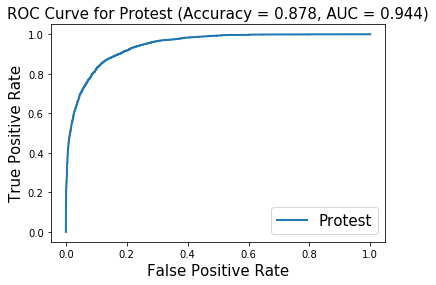

In [5]:
au.plotROC("protest", preds["protest"], preds["pred_protest"])

### Violence

Text(0.5,1,'violence (Correlation = 0.834, R_squared = 0.696 )')

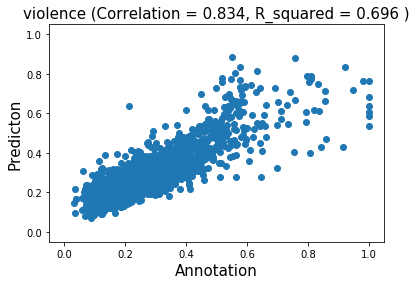

In [6]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
